In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

(359718, 22)


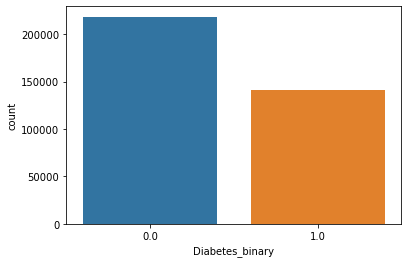

In [20]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df2 = df[df.Diabetes_binary==1]
df = pd.concat([df,df2])
df = pd.concat([df,df2])
df = pd.concat([df,df2])
sns.countplot(x=df.Diabetes_binary)
print(df.shape)

In [21]:
scaler = StandardScaler()
scaler.fit(df.drop('Diabetes_binary', axis=1))

StandardScaler()

In [22]:
scaled_feat = scaler.transform(df.drop('Diabetes_binary', axis=1))
df_feat = pd.DataFrame(scaled_feat, columns=df.columns[1:])
#df_feat
X = df_feat
y = df['Diabetes_binary']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
pred = model.predict(X_test)

In [27]:
print(confusion_matrix(y_test, pred))

[[53341 12088]
 [15232 27255]]


In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80     65429
         1.0       0.69      0.64      0.67     42487

    accuracy                           0.75    107916
   macro avg       0.74      0.73      0.73    107916
weighted avg       0.74      0.75      0.74    107916



In [29]:
df_test = df.head(30)
x_test = df_test.drop('Diabetes_binary', axis=1)
#tt = pd.read_csv("Test.csv")
x_feat=scaler.transform(x_test)
yt=scaler.transform(x_feat)


In [30]:
prediction= model.predict(x_feat)
prediction

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.])

In [31]:
model_file = "Model.pkl"
scaler_file = "Scaler.pkl"

""""Saving machine learning model to a file"""
with open("Model.pkl", 'wb') as file_1:
    pickle.dump(model, file_1)
""""Saving StandardScaler to a file"""
with open("Scaler.pkl", 'wb') as file_2:
    pickle.dump(scaler, file_2)